Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


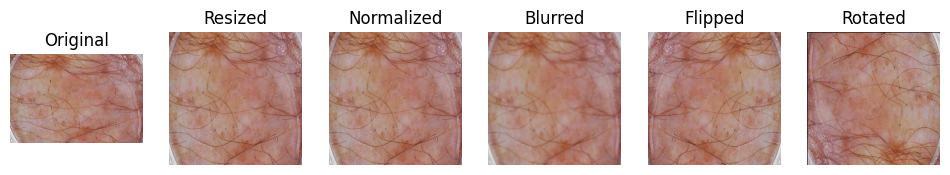

In [3]:
import cv2
import numpy as np
from PIL import Image, ImageEnhance
import matplotlib.pyplot as plt
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load an image using OpenCV with error handling
def load_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image file not found at {image_path}")
    # Convert from BGR (OpenCV) to RGB (Pillow)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

# Resize image
def resize_image(image, width, height):
    return cv2.resize(image, (width, height))

# Normalize image
def normalize_image(image):
    image = image.astype(np.float32) / 255.0
    return image

# Apply Gaussian Blur
def apply_gaussian_blur(image, kernel_size=(5, 5)):
    return cv2.GaussianBlur(image, kernel_size, 0)

# Perform data augmentation: Flip and Rotate
def augment_image(image):
    # Flip the image horizontally
    flipped_image = cv2.flip(image, 1)

    # Rotate the image by 45 degrees
    center = (image.shape[1] // 2, image.shape[0] // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, 180, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]))

    return flipped_image, rotated_image

# Display images using matplotlib
def display_images(images, titles):
    plt.figure(figsize=(12, 6))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img)
        plt.title(title)
        plt.axis('off')
    plt.show()

# Main function
def main():
    image_path = '/content/drive/MyDrive/Dataset/ISIC_0012153.jpg'  # Replace with your image path in Google Drive
    try:
        image = load_image(image_path)
    except FileNotFoundError as e:
        print(e)
        return

    resized_image = resize_image(image, 256, 256)
    normalized_image = normalize_image(resized_image)
    blurred_image = apply_gaussian_blur(resized_image)
    flipped_image, rotated_image = augment_image(resized_image)

    images = [image, resized_image, normalized_image, blurred_image, flipped_image, rotated_image]
    titles = ['Original', 'Resized', 'Normalized', 'Blurred', 'Flipped', 'Rotated']

    display_images(images, titles)

if __name__ == '__main__':
    main()


In [5]:
import cv2
import os
import numpy as np

# Load the image
def load_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image file not found at {image_path}")
    return image

# Convert image to grayscale
def convert_to_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Perform edge detection
def detect_edges(gray_image):
    return cv2.Canny(gray_image, 100, 200)

# Mask out hair regions (simple approach using edge detection)
def mask_hair(image, edges):
    # Create an inverse mask where hair regions are white
    mask = cv2.bitwise_not(edges)
    # Convert mask to 3 channels
    mask_3channel = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)
    # Create a mask for hair regions
    hair_mask = cv2.bitwise_and(image, mask_3channel)
    return hair_mask

# Inpaint the image to remove hair
def inpaint_image(image, mask):
    # Convert mask to grayscale for inpainting
    mask_gray = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    # Inpaint the image using the mask
    inpainted_image = cv2.inpaint(image, mask_gray, inpaintRadius=7, flags=cv2.INPAINT_TELEA)
    return inpainted_image

# Save the processed image
def save_image(image, file_path):
    # Ensure the directory exists
    os.makedirs(os.path.dirname(file_path), exist_ok=True)
    # Save the image
    if not cv2.imwrite(file_path, image):
        raise ValueError(f"Failed to save the image to {file_path}")

# Main function
def main():
    image_path = '/content/drive/MyDrive/Dataset/ISIC_0012153.jpg'  # Replace with your image path
    output_path = '/content/drive/MyDrive/Dataset/Sample/processed_image.jpg'  # Include filename with extension

    # Load and preprocess image
    image = load_image(image_path)
    gray_image = convert_to_grayscale(image)

    # Detect edges and create hair mask
    edges = detect_edges(gray_image)
    hair_mask = mask_hair(image, edges)

    # Inpaint image to remove hair
    result_image = inpaint_image(image, hair_mask)

    # Save the result
    save_image(result_image, output_path)

if __name__ == '__main__':
    main()


In [11]:
import cv2
import numpy as np
import os

# Load the image
def load_image(image_path):
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image file not found at {image_path}")
    return image

# Resize the image
def resize_image(image, width, height):
    return cv2.resize(image, (width, height))

# Normalize the image
def normalize_image(image):
    return image / 255.0  # Scale pixel values to [0, 1]

# Apply Gaussian blur
def blur_image(image, ksize=(5, 5)):
    return cv2.GaussianBlur(image, ksize, 0)

# Flip the image horizontally
def flip_image(image):
    return cv2.flip(image, 1)  # 1 indicates horizontal flip

# Rotate the image
def rotate_image(image, angle):
    center = (image.shape[1] // 2, image.shape[0] // 2)
    matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    return cv2.warpAffine(image, matrix, (image.shape[1], image.shape[0]))

# Save the processed image
def save_image(image, file_path):
    # Ensure the directory exists
    os.makedirs(os.path.dirname(file_path), exist_ok=True)
    # Convert the image to uint8 before saving
    image_uint8 = (image * 255).astype(np.uint8)
    if not cv2.imwrite(file_path, image_uint8):
        raise ValueError(f"Failed to save the image to {file_path}")

# Main function
def main():
    image_path = '/content/drive/MyDrive/Dataset/ISIC_0012153.jpg'  # Replace with your image path
    output_path = '/content/drive/MyDrive/Dataset/Sample/processed_image.jpg'  # Replace with your output path

    # Load and preprocess image
    image = load_image(image_path)
    resized_image = resize_image(image, 244, 244)  # Resize to 256x256
    normalized_image = normalize_image(resized_image)
    blurred_image = blur_image(normalized_image)
    flipped_image = flip_image(blurred_image)
    rotated_image = rotate_image(flipped_image, 90)  # Rotate by 45 degrees

    # Save the result
    save_image(rotated_image, output_path)

if __name__ == '__main__':
    main()
